In [3]:
from google.colab import files
uploaded = files.upload()

Saving Вопросы карьеры.csv to Вопросы карьеры.csv
Saving Вредные привычки, зависимость.csv to Вредные привычки, зависимость.csv
Saving Горе, потери.csv to Горе, потери.csv
Saving Депрессия.csv to Депрессия.csv
Saving Нервные расстройства.csv to Нервные расстройства.csv
Saving О достижении цели.csv to О достижении цели.csv
Saving Отношения с окружающими.csv to Отношения с окружающими.csv
Saving Поиск решения.csv to Поиск решения.csv
Saving Проблемы с детьми.csv to Проблемы с детьми.csv
Saving Проблемы с партнером.csv to Проблемы с партнером.csv
Saving Размышления о мире.csv to Размышления о мире.csv
Saving Самопознание, саморазвитие.csv to Самопознание, саморазвитие.csv
Saving Семейные проблемы.csv to Семейные проблемы.csv


In [4]:
!ls

 sample_data			     'Отношения с окружающими.csv'
'Вопросы карьеры.csv'		     'Поиск решения.csv'
'Вредные привычки, зависимость.csv'  'Проблемы с детьми.csv'
'Горе, потери.csv'		     'Проблемы с партнером.csv'
 Депрессия.csv			     'Размышления о мире.csv'
'Нервные расстройства.csv'	     'Самопознание, саморазвитие.csv'
'О достижении цели.csv'		     'Семейные проблемы.csv'


Let's create 2 files: training and test data

test data - 20%

In [5]:
from sklearn.model_selection import train_test_split
import os
import glob

In [6]:
extension = 'csv'
file_names = [i for i in glob.glob('*.{}'.format(extension))]
file_names_size = len(file_names);

Let's mark the data: add a column in which the value will mean the category number

In [7]:
import pandas as pd
import numpy as np

In [8]:
data_train = []
data_test = []

i = 0
while i<file_names_size:
  df = pd.read_csv(file_names[i], header=0)
  df['THEME'] = i
  train, test = train_test_split(df, test_size=0.2, random_state=2)
  data_train.append(train)
  data_test.append(test)
  i = i + 1

combining the data into a single file

-train

In [9]:
final_data_train = pd.concat(data_train)
final_data_train.to_csv( 'train.csv', index=False, encoding='utf-8-sig')
!wc -l train.csv

10545 train.csv


-test

In [10]:
final_data_test = pd.concat(data_test)
final_data_test.to_csv( "test.csv", index=False, encoding='utf-8-sig')
!wc -l test.csv

2642 test.csv


In [11]:
train = pd.read_csv('train.csv', header=0)
train[:3]

,Unnamed: 0,USER_ID,USER_NICKNAME,TITLE,MESSAGE,DATE_TIME,TOPIC_LIKES_COUNT,URL,THEME
0,978,u101679,Mi-shel,Муж в реанимации. Просто поддержите,Вчера в 5 утра у мужа случился обширный инсуль...,2017-05-10 05:55,6,https://www.b17.ru/forum/topic.php?id=75927,0
1,863,u261348,катерина121,чувство вины. Незавершенность ситуации,перестала общаться с молод. человеком,2017-09-30 18:26,2,https://www.b17.ru/forum/topic.php?id=89707,0
2,658,u326689,LusiLi,Страдания и переживания сопровождают меня посл...,"Здравствуйте! Пишу сюда, потому что не знаю и ...",2018-05-04 16:44,1,https://www.b17.ru/forum/topic.php?id=115519,0


In [12]:
test = pd.read_csv('test.csv', header=0)
test[:3]

,Unnamed: 0,USER_ID,USER_NICKNAME,TITLE,MESSAGE,DATE_TIME,TOPIC_LIKES_COUNT,URL,THEME
0,71,u478927,Akkie,Бывший отрезал от потенциально интересующей ме...,Рассталась с молодым человеком очень тяжело по...,2020-02-22 21:19,3,https://www.b17.ru/forum/topic.php?id=303879,0
1,945,u238151,Юлия,Решилась. Поддержите (((,"Дошла до точки,решилась.Сегодня соберу все его...",2017-06-12 13:10,21,https://www.b17.ru/forum/topic.php?id=78871,0
2,951,u239602,Воскресение,переживание расставания,Здравствуйте. Более полутора года назад в наше...,2017-06-11 16:05,2,https://www.b17.ru/forum/topic.php?id=78797,0


Protection against unexpected strings such as 'nan'

In [13]:
trb_nan_idx = train[pd.isnull(train['MESSAGE'])].index.tolist()
train.loc[trb_nan_idx, 'MESSAGE'] = ' '
train.loc[trb_nan_idx, 'MESSAGE'] = ' '

In [14]:
from tensorflow.keras import utils
x_train = train['MESSAGE']
y_train = utils.to_categorical(train['THEME'],file_names_size)

In [15]:
import nltk
import re
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("russian")
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

get a word form for each token (stemming)

In [21]:
def token_and_stem(text):
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    for token in tokens:
        if re.search('[а-яА-Я]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

In [22]:
upd_x_train = []

for i in x_train:
  upd_train = token_and_stem(i)
  upd_x_train.append(upd_train)

In [24]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('russian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
tokens = []
train = []

for x_tr in upd_x_train:
  for token in x_tr:
    if token not in stopwords:
      tokens.append(token)
  train.append(tokens)
  tokens = []

In [27]:
x_train[:3]

0    Вчера в 5 утра у мужа случился обширный инсуль...
1                перестала общаться с молод. человеком
2    Здравствуйте! Пишу сюда, потому что не знаю и ...
Name: MESSAGE, dtype: object

In [ ]:
train[:3]

In [29]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [30]:
num_words = 3000
tokenizer = Tokenizer(num_words=num_words, filters='0123456789!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ')

In [32]:
tokenizer.fit_on_texts(train)
tokenizer.word_index
sequences = tokenizer.texts_to_sequences(train)

In [33]:
print(x_train[0])
print(train[0])
print(sequences[0])

Вчера в 5 утра у мужа случился обширный инсульт. Сейчас лежит в коме. Нервы сдают. Страшно.Пожалуйста, просто поговорите со мной
['вчер', 'утр', 'муж', 'случ', 'обширн', 'инсульт', 'леж', 'ком', 'нерв', 'сдают', 'страшно.пожалуйст', 'прост', 'поговор', 'мно']
[574, 224, 40, 334, 2883, 1066, 407, 860, 19, 279, 79]


In [34]:
max_text_len = 100
x_train = pad_sequences(sequences, maxlen=max_text_len)
x_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,  574,  224,   40,  334, 2883, 1066,  407,  860,   19,  279,
         79], dtype=int32)

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, MaxPooling1D, Conv1D, GlobalMaxPooling1D, Dropout, LSTM, GRU

In [42]:
model_cnn = Sequential()
model_cnn.add(Embedding(num_words, 32, input_length=max_text_len))

model_cnn.add(Conv1D(500, 5, padding='valid', activation='relu'))
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(Dropout(0.2))

model_cnn.add(Dense(169, activation='relu'))
model_cnn.add(Dropout(0.2))
model_cnn.add(Dense(file_names_size, activation='softmax'))

In [43]:
model_cnn.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [44]:
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 32)           96000     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 96, 500)           80500     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 500)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 169)               84669     
_________________________________________________________________
dropout_3 (Dropout)          (None, 169)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 13)               

In [45]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [46]:
model_cnn_save_path = 'cnn.h5'
checkpoint_callback_cnn = ModelCheckpoint(model_cnn_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [47]:
random_seed = 2
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state=random_seed)

In [48]:
history_cnn = model_cnn.fit(X_train, 
                            Y_train, 
                            epochs=50,
                            validation_data=(X_val, Y_val),
                            batch_size=256,
                            callbacks=[checkpoint_callback_cnn])

Epoch 1/50
38/38 [==============================] - 11s 271ms/step - loss: 2.5622 - accuracy: 0.0826 - val_loss: 2.5552 - val_accuracy: 0.0911

Epoch 00001: val_accuracy improved from -inf to 0.09108, saving model to cnn.h5
Epoch 2/50
38/38 [==============================] - 10s 265ms/step - loss: 2.5016 - accuracy: 0.1428 - val_loss: 2.4232 - val_accuracy: 0.1869

Epoch 00002: val_accuracy improved from 0.09108 to 0.18691, saving model to cnn.h5
Epoch 3/50
38/38 [==============================] - 10s 268ms/step - loss: 2.3095 - accuracy: 0.2198 - val_loss: 2.2342 - val_accuracy: 0.2524

Epoch 00003: val_accuracy improved from 0.18691 to 0.25237, saving model to cnn.h5
Epoch 4/50
38/38 [==============================] - 10s 265ms/step - loss: 2.1180 - accuracy: 0.2831 - val_loss: 2.0856 - val_accuracy: 0.2932

Epoch 00004: val_accuracy improved from 0.25237 to 0.29317, saving model to cnn.h5
Epoch 5/50
38/38 [==============================] - 10s 264ms/step - loss: 1.9273 - accuracy: 0

In [49]:
import matplotlib.pyplot as plt

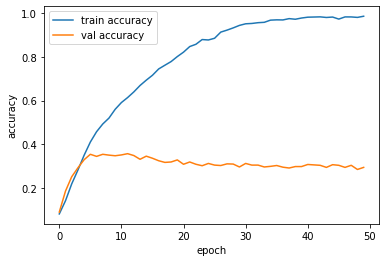

In [50]:
plt.plot(history_cnn.history['accuracy'], 
         label='train accuracy')
plt.plot(history_cnn.history['val_accuracy'], 
         label='val accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [51]:
model_lstm = Sequential()
model_lstm.add(Embedding(num_words, 32, input_length=max_text_len))
model_lstm.add(LSTM(169))
model_lstm.add(Dense(13, activation='softmax'))

In [52]:
model_lstm.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [53]:
model_lstm.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 32)           96000     
_________________________________________________________________
lstm (LSTM)                  (None, 169)               136552    
_________________________________________________________________
dense_4 (Dense)              (None, 13)                2210      
Total params: 234,762
Trainable params: 234,762
Non-trainable params: 0
_________________________________________________________________


In [54]:
model_lstm_save_path = 'lstm.h5'
checkpoint_callback_lstm = ModelCheckpoint(model_lstm_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [55]:
history_lstm = model_lstm.fit(X_train, 
                            Y_train, 
                            epochs=50,
                            validation_data=(X_val, Y_val),
                            batch_size=256,
                            callbacks=[checkpoint_callback_lstm])

Epoch 1/50
38/38 [==============================] - 21s 508ms/step - loss: 2.5469 - accuracy: 0.1051 - val_loss: 2.4816 - val_accuracy: 0.1319

Epoch 00001: val_accuracy improved from -inf to 0.13188, saving model to lstm.h5
Epoch 2/50
38/38 [==============================] - 19s 492ms/step - loss: 2.3964 - accuracy: 0.1503 - val_loss: 2.4608 - val_accuracy: 0.1556

Epoch 00002: val_accuracy improved from 0.13188 to 0.15560, saving model to lstm.h5
Epoch 3/50
38/38 [==============================] - 18s 485ms/step - loss: 2.3361 - accuracy: 0.1649 - val_loss: 2.3233 - val_accuracy: 0.1423

Epoch 00003: val_accuracy did not improve from 0.15560
Epoch 4/50
38/38 [==============================] - 18s 486ms/step - loss: 2.2553 - accuracy: 0.1712 - val_loss: 2.4184 - val_accuracy: 0.1765

Epoch 00004: val_accuracy improved from 0.15560 to 0.17647, saving model to lstm.h5
Epoch 5/50
38/38 [==============================] - 18s 476ms/step - loss: 2.1996 - accuracy: 0.2192 - val_loss: 2.3550 

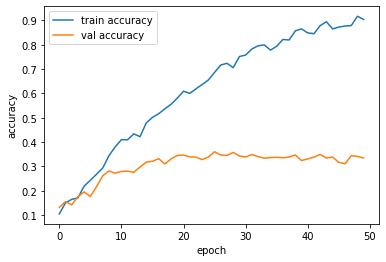

In [56]:
plt.plot(history_lstm.history['accuracy'], 
         label='train accuracy')
plt.plot(history_lstm.history['val_accuracy'], 
         label='val accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [57]:
model_gru = Sequential()
model_gru.add(Embedding(num_words, 32, input_length=max_text_len))
model_gru.add(GRU(169))
model_gru.add(Dense(13, activation='softmax'))

In [58]:
model_gru.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [59]:
model_gru.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 32)           96000     
_________________________________________________________________
gru (GRU)                    (None, 169)               102921    
_________________________________________________________________
dense_5 (Dense)              (None, 13)                2210      
Total params: 201,131
Trainable params: 201,131
Non-trainable params: 0
_________________________________________________________________


In [60]:
model_gru_save_path = 'gru.h5'
checkpoint_callback_gru = ModelCheckpoint(model_gru_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [62]:
upd_history_gru = model_gru.fit(X_train, 
                            Y_train, 
                            epochs=50,
                            validation_data=(X_val, Y_val),
                            batch_size=256,
                            callbacks=[checkpoint_callback_gru])

Epoch 1/50
38/38 [==============================] - 17s 397ms/step - loss: 2.5642 - accuracy: 0.0874 - val_loss: 2.5587 - val_accuracy: 0.1195

Epoch 00001: val_accuracy improved from -inf to 0.11954, saving model to gru.h5
Epoch 2/50
38/38 [==============================] - 15s 393ms/step - loss: 2.5143 - accuracy: 0.1460 - val_loss: 2.3852 - val_accuracy: 0.1755

Epoch 00002: val_accuracy improved from 0.11954 to 0.17552, saving model to gru.h5
Epoch 3/50
38/38 [==============================] - 15s 390ms/step - loss: 2.2434 - accuracy: 0.2337 - val_loss: 2.1987 - val_accuracy: 0.2353

Epoch 00003: val_accuracy improved from 0.17552 to 0.23529, saving model to gru.h5
Epoch 4/50
38/38 [==============================] - 15s 392ms/step - loss: 2.0751 - accuracy: 0.2849 - val_loss: 2.1364 - val_accuracy: 0.2552

Epoch 00004: val_accuracy improved from 0.23529 to 0.25522, saving model to gru.h5
Epoch 5/50
38/38 [==============================] - 15s 388ms/step - loss: 1.9569 - accuracy: 0

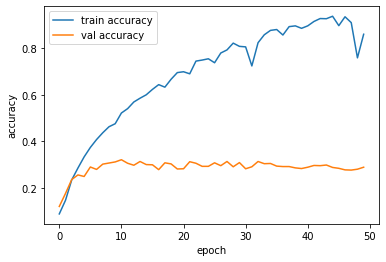

In [64]:
plt.plot(upd_history_gru.history['accuracy'], 
         label='train accuracy')
plt.plot(upd_history_gru.history['val_accuracy'], 
         label='val accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [65]:
x_test = test['MESSAGE']
y_test = utils.to_categorical(test['THEME'],file_names_size)

In [66]:
upd_x_test = []
i = 0

for i in x_test:
  upd_test = token_and_stem(i)
  upd_x_test.append(upd_test)

In [67]:
tokens = []
test = []

for x_tr in upd_x_test:
  for token in x_tr:
    if token not in stopwords:
      tokens.append(token)
  test.append(tokens)
  tokens = []

In [68]:
test_sequences = tokenizer.texts_to_sequences(test)
x_test = pad_sequences(test_sequences, maxlen=max_text_len)

In [69]:
model_cnn.load_weights(model_cnn_save_path)
model_cnn.evaluate(x_test, y_test, verbose=1)

83/83 [==============================] - 1s 10ms/step - loss: 2.0555 - accuracy: 0.3685


[2.0555338859558105, 0.3684609532356262]

In [77]:
from sklearn.metrics import classification_report
pred = model_cnn.predict(x_test, batch_size = 32)
pred = np.argmax(pred, axis=1)
answer_y_test = np.argmax(y_test, axis=1)
print(classification_report(answer_y_test, pred))

              precision    recall  f1-score   support

           0       0.46      0.47      0.47       202
           1       0.37      0.47      0.42       201
           2       0.45      0.51      0.48       202
           3       0.11      0.08      0.09       201
           4       0.23      0.22      0.22       202
           5       0.29      0.26      0.28       203
           6       0.31      0.36      0.34       203
           7       0.44      0.31      0.37       203
           8       0.37      0.49      0.42       205
           9       0.47      0.59      0.52       203
          10       0.18      0.14      0.16       204
          11       0.28      0.20      0.23       204
          12       0.64      0.68      0.66       205

    accuracy                           0.37      2638
   macro avg       0.36      0.37      0.36      2638
weighted avg       0.36      0.37      0.36      2638



In [70]:
model_lstm.load_weights(model_lstm_save_path)
model_lstm.evaluate(x_test, y_test, verbose=1)

83/83 [==============================] - 3s 39ms/step - loss: 2.4022 - accuracy: 0.3495


[2.4021568298339844, 0.349507212638855]

In [78]:
pred = model_lstm.predict(x_test, batch_size = 32)
pred = np.argmax(pred, axis=1)
answer_y_test = np.argmax(y_test, axis=1)
print(classification_report(answer_y_test, pred))

              precision    recall  f1-score   support

           0       0.40      0.40      0.40       202
           1       0.37      0.42      0.39       201
           2       0.49      0.41      0.44       202
           3       0.10      0.05      0.07       201
           4       0.23      0.33      0.27       202
           5       0.28      0.23      0.25       203
           6       0.34      0.38      0.36       203
           7       0.42      0.35      0.38       203
           8       0.33      0.47      0.39       205
           9       0.59      0.38      0.46       203
          10       0.16      0.15      0.15       204
          11       0.26      0.37      0.30       204
          12       0.68      0.60      0.64       205

    accuracy                           0.35      2638
   macro avg       0.36      0.35      0.35      2638
weighted avg       0.36      0.35      0.35      2638



In [71]:
model_gru.load_weights(model_gru_save_path)
model_gru.evaluate(x_test, y_test, verbose=1)

83/83 [==============================] - 2s 25ms/step - loss: 2.2184 - accuracy: 0.3184


[2.218365430831909, 0.3184230625629425]

In [79]:
pred = model_gru.predict(x_test, batch_size = 32)
pred = np.argmax(pred, axis=1)
answer_y_test = np.argmax(y_test, axis=1)
print(classification_report(answer_y_test, pred))

              precision    recall  f1-score   support

           0       0.39      0.49      0.43       202
           1       0.32      0.30      0.31       201
           2       0.42      0.34      0.38       202
           3       0.11      0.05      0.07       201
           4       0.19      0.21      0.20       202
           5       0.20      0.15      0.17       203
           6       0.24      0.31      0.27       203
           7       0.37      0.24      0.29       203
           8       0.31      0.48      0.38       205
           9       0.44      0.62      0.51       203
          10       0.19      0.12      0.15       204
          11       0.20      0.21      0.20       204
          12       0.58      0.62      0.60       205

    accuracy                           0.32      2638
   macro avg       0.30      0.32      0.30      2638
weighted avg       0.30      0.32      0.30      2638



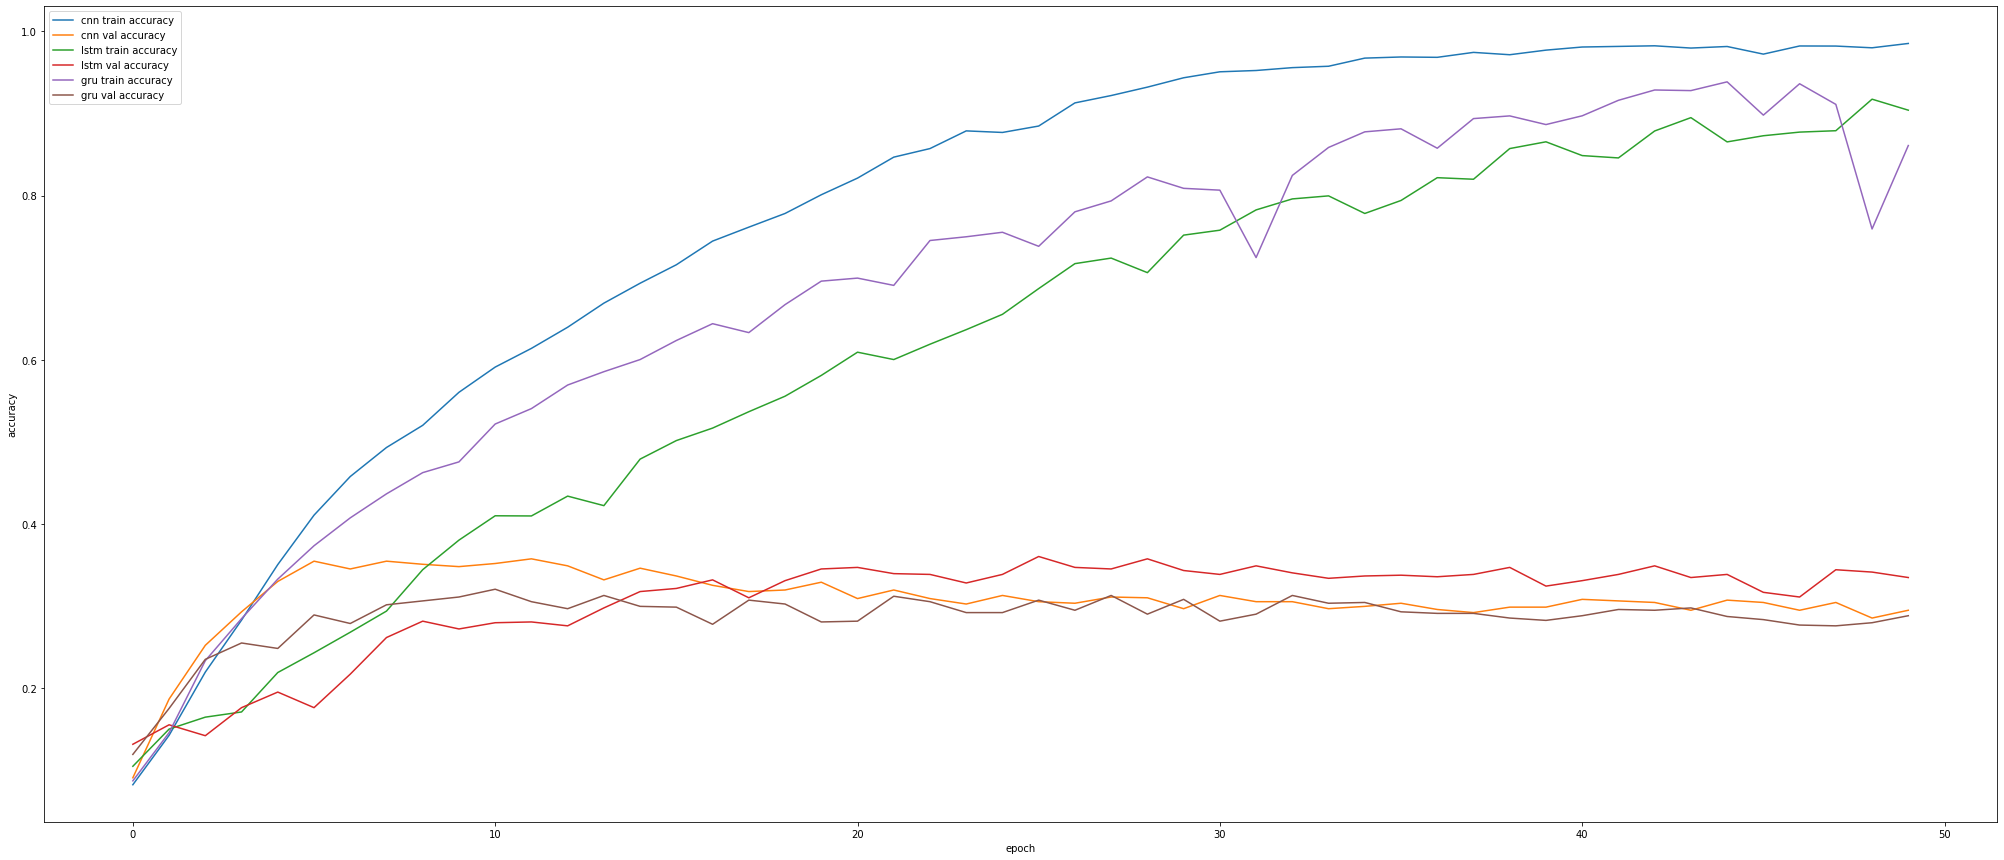

In [76]:
plt.plot(history_cnn.history['accuracy'], 
         label='cnn train accuracy')
plt.plot(history_cnn.history['val_accuracy'], 
         label='cnn val accuracy')

plt.plot(history_lstm.history['accuracy'], 
         label='lstm train accuracy')
plt.plot(history_lstm.history['val_accuracy'], 
         label='lstm val accuracy')

plt.plot(upd_history_gru.history['accuracy'], 
         label='gru train accuracy')
plt.plot(upd_history_gru.history['val_accuracy'], 
         label='gru val accuracy')

plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.rcParams["figure.figsize"] = (35,15)
plt.legend()
plt.show()